# Felipe Carvalho Pereira
# RA: 1900614
# E-mail: felipe.pereira@aluno.faculdadeimpacta.com.br
__________________________________________________________________________________________________

# João Vitor Peirera
# RA:1801990
# E-mail: joao.pereira@aluno.faculdadeimpacta.com.br	
___________________________________________________________________________________________________

# Atividade continua 4 - Data Analytics

In [17]:
import csv
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
base = pd.read_csv('base.csv', encoding = 'UTF-8', sep = ',', header = 0)

In [4]:
# 2. (1,0) Exiba a base de dados no Jupyter.
base.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


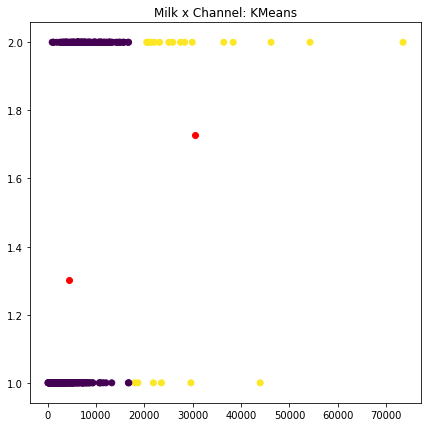

In [6]:
# Questão 3
x = base.Milk.values
y = base.Channel.values
grafico1 = KMeans(n_clusters=2)
grupos = grafico1.fit_predict(base[['Milk','Channel']].values)
plt.figure(figsize=(7,7))
plt.scatter(x, y, c=grupos);
plt.title("Milk x Channel: KMeans")
plt.scatter(grafico1.cluster_centers_[:, 0],grafico1.cluster_centers_[:,1], c='red');

# Questão 3
Usando o KMeans, podemos provar que o canal 1(o setor de hospitalidade) tem um gasto anual com produtos lácteos mais homogeneo e em menor escala se comparado com o varejo que é o canal 2.
O canal 2 possui uma frequencia menor na base e apresenta maior um gasto médio com produtos lácteos maior.

Text(0.5, 1.0, 'Fresh x Region: DBSCAN')

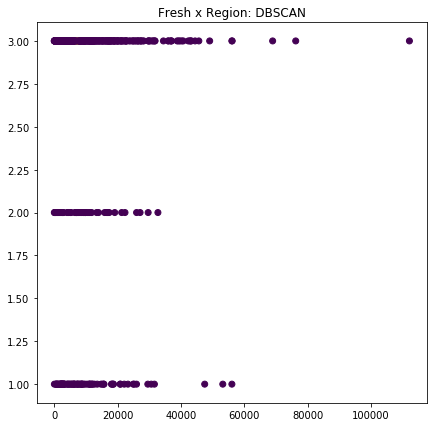

In [8]:
# Questão 4
x = base.Fresh.values
y = base.Region.values
grafico2 = DBSCAN(eps=.3, min_samples=2)
grupos = grafico2.fit_predict(base[['Fresh','Region']].values)
plt.figure(figsize=(7,7))
plt.scatter(x,y,c=grupos);
plt.title("Fresh x Region: DBSCAN")

Questão 4:
Usamos o DBSCAN para comparar o gasto anual com produtos frescos.
Regição 1(Lisboa): Em uma comparação mais justa(Região 1 x Região 2), podemos dizer que a região de Lisboa possui uma média anual maior de consumo nos produtos frescos.
Região 2(Porto): Consumo mais homogêneo, praticamente sem outliers. 
Região 3(Outra Região): possui uma frequencia maior na base, pelo fato de englobar mais de uma cidade. É a regição mais dificil de prever o seu comportamento, possuie resultados mais variados.

In [13]:
corpus = ["Go until jurong point, crazy.. Available only",
"Ok lar... Joking wif u oni.",
"Free entry in 2 a wkly comp to win FA Cup fina",
"U dun say so early hor... U c already then say",
"Nah I don't think he goes to usf, he lives aro",
"FreeMsg Hey there darling it's been 3 week's n"]

In [14]:
# Questão 1
bag_of_words = CountVectorizer(stop_words =['Go', 'wif', 'win', 'to', 'so', 'goes', 'been', 'he'])

In [15]:
# Questão 2
dados = bag_of_words.fit_transform(corpus)
print(dados.toarray())

[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0
  0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
  0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  0]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['go'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [18]:
# Questão 3
np.set_printoptions(precision=2)
x = dados.toarray()
print(x)

[[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
  0]
 [0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1]
 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0
  0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0
  0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  0]]
